In [1]:
using Plots, DifferentialEquations

WebIO._IJuliaInit()

# calculo de valores finales y maximo de variables para el ejercicio de SIR ejemplificado con el duffing

In [2]:
function duffing!(du,u,p,t)
    (γ,β)=p
    du[1] = u[2]
    du[2] = -γ*u[2]+u[1]*(β-u[1]*u[1])
    du
end    

duffing! (generic function with 1 method)

In [24]:
sol = solve(ODEProblem(duffing!,[0.1;0.1],(0,30.0),[3.0,1.0]));

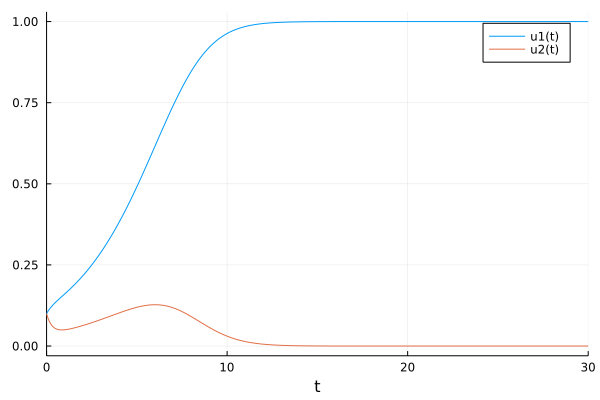

In [25]:
plot(sol)

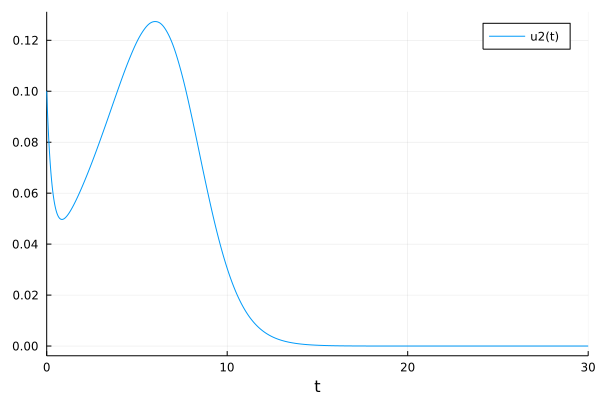

In [7]:
plot(sol,vars=(0,2))

In [26]:
x = getindex.(sol.u,1)
y = getindex.(sol.u,2);
t = sol.t;

In [30]:
(xfin,yfin) = sol.u[end]

2-element Vector{Float64}:
  1.000000087807858
 -1.766890988261214e-7

In [42]:
maximum(getindex.(sol.u,2))

0.526632239651246

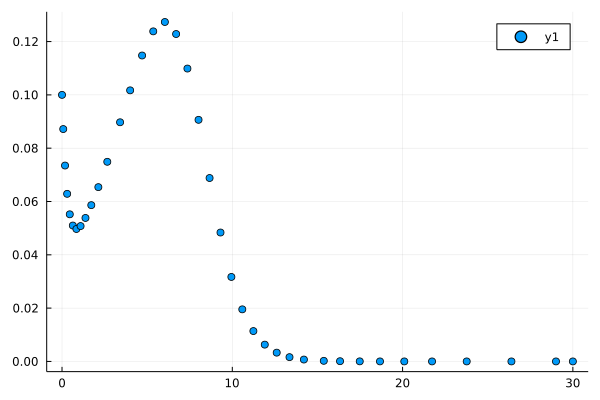

In [27]:
scatter(t,y)

In [45]:
γ=0.3
βlist = 0.01:0.01:0.3
xfinlist = []
yfinlist = []
ymaxlist = []
for β in βlist
    sol = solve(ODEProblem(duffing!,[0.1;0.1],(0,120.0),[γ,β]));
    (xfin,yfin) = sol.u[end] # xfin yfin el ultimo valor de mis variables
    ymax = maximum(getindex.(sol.u,2)) # ymax maximo valor de la variable y
    append!(xfinlist,xfin)
    append!(yfinlist,yfin)
    append!(ymaxlist,ymax)
end    


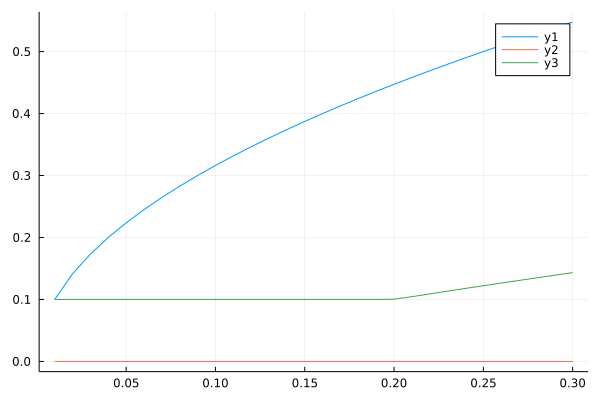

In [49]:
plot(βlist,xfinlist)
plot!(βlist,yfinlist)
plot!(βlist,ymaxlist)

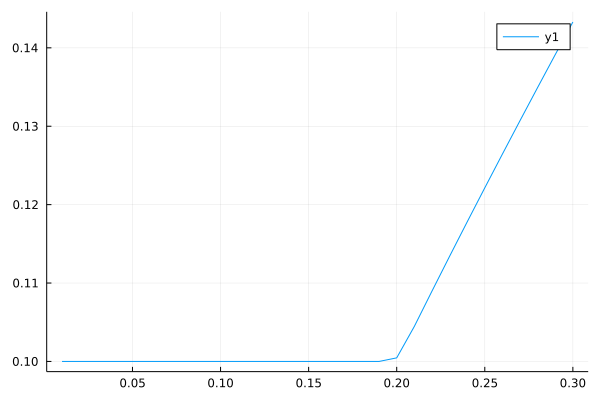

In [47]:
plot(βlist,ymaxlist)

# calculo de frecuencia del van der pol usando cruces por cero

In [50]:
function vdp!(du,u,p,t)
    du[1] = u[2]
    du[2] = p[1]*(1.0-u[1]*u[1])*u[2]-u[1]
    du
end    

vdp! (generic function with 1 method)

In [53]:
sol = solve(ODEProblem(vdp!,[0.1;0.1],(0,3000.0),[0.1]));

In [97]:
# extraemos la segunda mitad
xfull = getindex.(sol.u,1);
tfull = sol.t
halflength = Int(length(xfull)/2)
x = xfull[end-halflength:end]
t = tfull[end-halflength:end];

In [90]:
#@ intervalo de tiempo
lapso = t[end]-t[1]

814.6084736636694

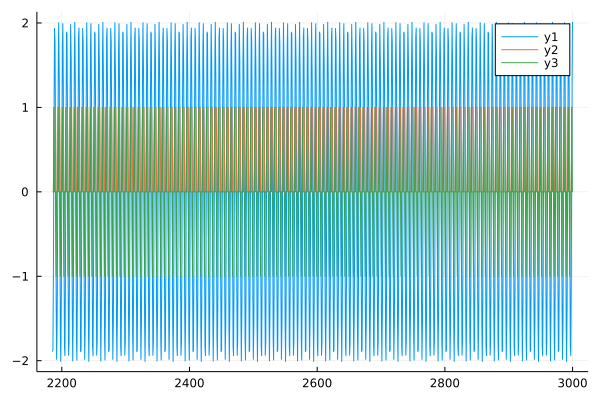

In [88]:
# extraemos los cruces viendo cuando cambia el signo de negativo a positivo
xsigno = x.>0;
xcruce = diff(xsigno)
cruces = sum(xcruce.==1)
plot(t,x)
plot!(t,xsigno)
plot!(t[2:end],xcruce)

In [99]:
frecuencia = cruces/lapso

0.15958586757062584